# THE FINAL PROJECT

>## Modeling

# Import Libraries

In [118]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# PREPROCESSING
# Imputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer
# Transformer/Encoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 
# Scaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
# Power Transformer
from sklearn.preprocessing import PowerTransformer

# MODELING
# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
# Metric Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# TUNING
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV 

# Load Dataset

In [119]:
pd.options.display.max_columns = 100

In [120]:
# Load Dataset
df = pd.read_csv('Engineering_graduate_salary.csv')
df

# 2998 rows × 34 columns

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,B.Tech/B.E.,electronics and communication engineering,70.00,1263,1,Tamil Nadu,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,B.Tech/B.E.,information technology,75.20,9481,0,Tamil Nadu,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,B.Tech/B.E.,information technology,73.19,547,0,Madhya Pradesh,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,B.Tech/B.E.,computer engineering,74.81,1629,1,Karnataka,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [121]:
df.iloc[:,0:8].head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse


In [122]:
df.iloc[:,8:17].head()

,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear
0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013
1,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014
2,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011
3,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013
4,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012


In [123]:
df.iloc[:,17:28].head()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1
1,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1
2,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1
3,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1
4,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

# 1. Pre-Processing

Drop
>- ID 
>- CollegeID (seharusnya tidak ordinal, dan sudah diwakilkan CollegeTier)
>- CollegeCityID (seharusnya tidak ordinal, dan sudah diwakilkan CollegeCityTier)


Outliers
>- graduation year (0): 1 row
>- sum() skill (0): 94 rows, tidak mengisi hardskill apapun
>- berdasarkan EDA, Graduates dengan gaji > 1 juta rupee (25 rows)

Ubah Value
>- DOB: split lalu ambil tahunnya saja

Missing Value
>- 10board ('0'): 256
>- 12board ('0'): 264
>- GraduationYear (0):1, median
>- Domain (-1): 179
>- ComputerProgramming (-1): 650
>- ElectronicsAndSemicon (-1): 2133
>- ComputerScience (-1): 2298
>- MechanicalEngg (-1): 2811
>- ElectricalEngg (-1): 2876
>- TelecomEngg (-1): 2744
>- CivilEngg (-1): 2972

Encoding
>- Gender: onehot
>- 10board: onehot/binary
>- 12board: onehot/binary
>- Degree: onehot
>- Specialization: onehot/binary
>- CollegeState: onehot/binary


## Load Dataset

In [125]:
# Load Dataset
df = pd.read_csv('Engineering_graduate_salary.csv')
df.shape

(2998, 34)

## Handling Missing Value

In [126]:
# Handling Missing Value 

df[['10board','12board']] = df[['10board','12board']].replace('0', np.NaN)

df[['GraduationYear']] = df[['GraduationYear']].replace(0, np.NaN)

df[['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']] = df[['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].replace(-1, 0)

## Drop Rows & Columns

In [127]:
# Drop Rows (outliers)

sum_skills = df[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].sum(axis=1)

df['sum_skills'] = sum_skills
df.shape

(2998, 35)

In [128]:
gradyear_outliers = df.loc[df['GraduationYear'].isna() == True] # drop Graduation Year outlier

df = df.drop(gradyear_outliers.index)
df.shape

(2997, 35)

In [129]:
salary_outliers = df.loc[df['Salary']>1000000] # drop Graduates dengan gaji > 1juta

df = df.drop(salary_outliers.index)
df.shape

(2972, 35)

In [130]:
skills_outliers = df.loc[df['sum_skills']==0] # drop yg Tidak mengisi skill apapun

df = df.drop(skills_outliers.index)
df.shape

(2878, 35)

In [131]:
df.isna().sum()

ID                         0
Gender                     0
DOB                        0
10percentage               0
10board                  244
12graduation               0
12percentage               0
12board                  252
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Salary                     0
sum_skills    

In [132]:
# Drop Columns
df = df.drop(columns=['ID','sum_skills','CollegeID','CollegeCityID'])
df.shape

(2878, 31)

## Modify Value of Columns

In [133]:
# Ubah DOB
df['DOB'] = [int(i.split('-')[0]) for i in df['DOB']]
df.head(3)

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013.0,650,665,810,0.694479,485,366,0,0,0,0,0,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,m,1990,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014.0,440,435,210,0.342315,365,0,0,0,0,0,0,1.1336,0.0459,1.2396,0.5262,-0.2859,110000
2,m,1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011.0,485,475,505,0.824666,0,400,0,0,0,260,0,0.5100,-0.1232,1.5428,-0.2902,-0.2875,255000


In [134]:
df['CollegeTier'].head()

0    1
1    2
2    2
3    1
4    2
Name: CollegeTier, dtype: int64

In [135]:
df.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013.0,650,665,810,0.694479,485,366,0,0,0,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,1990,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014.0,440,435,210,0.342315,365,0,0,0,0,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011.0,485,475,505,0.824666,0,400,0,0,0,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,1991,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,1,Delhi,2013.0,675,620,635,0.990009,655,0,0,0,0,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,1990,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,1,Tamil Nadu,2012.0,575,495,365,0.278457,315,0,0,0,0,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [136]:
df.isna().sum()

Gender                     0
DOB                        0
10percentage               0
10board                  244
12graduation               0
12percentage               0
12board                  252
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Salary                     0
dtype: int64

In [137]:
df.columns, df.shape
# tidak ada CollgeID dan CollegeCityID

(Index(['Gender', 'DOB', '10percentage', '10board', '12graduation',
        '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
        'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
        'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
        'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
        'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
        'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
        'Salary'],
       dtype='object'),
 (2878, 31))

## Column Transformer & Pipeline

In [138]:
# pipeline imputer+binary
imputer_binary = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# pipeline imputer+binary
imputer_onehot = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Transformer
transformer = ColumnTransformer([
    ('imputer_binary', imputer_binary, ['10board','12board']),
    ('onehot', OneHotEncoder(drop='first'), ['Gender','CollegeTier', 'Degree','CollegeCityTier']),
    ('binary', ce.BinaryEncoder(), ['Specialization','CollegeState'])
], remainder='passthrough')


In [139]:
# 

# 2. Split Dataset

In [140]:
df.head(3)

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013.0,650,665,810,0.694479,485,366,0,0,0,0,0,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,m,1990,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014.0,440,435,210,0.342315,365,0,0,0,0,0,0,1.1336,0.0459,1.2396,0.5262,-0.2859,110000
2,m,1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011.0,485,475,505,0.824666,0,400,0,0,0,260,0,0.5100,-0.1232,1.5428,-0.2902,-0.2875,255000


In [141]:
# Features and Label
X = df.drop(columns='Salary') 
y = df['Salary']

In [142]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Benchmark

### Coba cari model tanpa hyperparameter tuning

In [143]:
# model
enet = ElasticNet()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
xgboost = XGBRegressor()

# model pipeline
model_pipeline = Pipeline([
    ('transformer', transformer),
    ('model', enet)
])

# model options
hyperparam_models = {
    'model':[enet, svr, knn, tree, forest, xgboost]
}

# model grid search
model = GridSearchCV(
    estimator = model_pipeline,
    param_grid = hyperparam_models,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    n_jobs = -1
)

# fitting model to train set
model.fit(X_train, y_train)

# show best model
model.best_params_

{'model': ElasticNet()}

In [144]:
# Predict to X_test
y_pred = model.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.2996
RMSE      115959.8394


In [145]:
# model pipeline
model_pipeline = Pipeline([
    ('transformer', transformer),
    ('model', ElasticNet())
])

# fit train set
model_pipeline.fit(X_train, y_train)

# Predict to X_test
y_pred = model_pipeline.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.2996
RMSE      115959.8394


### Coba cari model dengan hyperparameter tuning terbaik 

In [146]:
# import libraries
import jcopml
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import random_search_params as rsp 
from jcopml.feature_importance import mean_score_decrease
from jcopml.plot import plot_residual

In [147]:
# Column Transformer
# Scaling Robust Scaaler semua feature numerical
# OneHot encoding semua feature categorical

transformer = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['DOB', '10percentage', '12graduation', '12percentage', 'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain','ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']),
    ('categoric', cat_pipe(encoder='onehot'), ['Gender','10board','12board','CollegeTier','Degree','Specialization', 'CollegeCityTier','CollegeState'])
])


### a. Elastic Net

In [148]:
# model pipeline
model_pipeline = Pipeline([
    ('prep', transformer),
    ('algo', ElasticNet())
])

# model random search
model_enet = RandomizedSearchCV(
    model_pipeline,
    rsp.enet_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# fit train set
model_enet.fit(X_train,y_train)

# best param for model
print(model_enet.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__alpha': 0.09178539435251566, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.7106628896857875}


In [149]:
# score
print('train ',model_enet.score(X_train,y_train))
print('val   ',model_enet.best_score_) 
print('test  ',model_enet.score(X_test, y_test))
print()

# Predict to X_test
y_pred_enet = model_enet.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred_enet),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred_enet, squared=False),4))

train  0.3444625420605615
val    0.30672173341007536
test   0.3329075099499771

R square  0.3329
RMSE      113170.3653


### b. SVR

In [150]:
# model pipeline
model_pipeline = Pipeline([
    ('prep', transformer),
    ('algo', SVR())
])

# model random search
model_svr = RandomizedSearchCV(
    model_pipeline,
    rsp.svm_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# fit train set
model_svr.fit(X_train,y_train)

# best param for model
print(model_svr.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__C': 98.77700294007921, 'algo__gamma': 0.01879466824163846}


In [151]:
# score
print('train ',model_svr.score(X_train,y_train))
print('val   ',model_svr.best_score_) 
print('test  ',model_svr.score(X_test, y_test))
print()

# Predict to X_test
y_pred_svr = model_svr.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred_svr),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred_svr, squared=False),4))

train  0.014108020406089827
val    0.006617194641249502
test   0.010389979702298935

R square  0.0104
RMSE      137838.8795


### c. Random Forest

In [152]:
# model pipeline
model_pipeline = Pipeline([
    ('prep', transformer),
    ('algo', RandomForestRegressor())
])

# model random search
model_rf = RandomizedSearchCV(
    model_pipeline,
    rsp.rf_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# fit train set
model_rf.fit(X_train,y_train)

# best param for model
print(model_rf.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__max_depth': 22, 'algo__max_features': 0.1185260448662222, 'algo__min_samples_leaf': 2, 'algo__n_estimators': 187}


In [153]:
# score
print('train ',model_rf.score(X_train,y_train))
print('val   ',model_rf.best_score_) 
print('test  ',model_rf.score(X_test, y_test))
print()

# Predict to X_test
y_pred_rf = model_rf.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred_rf),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred_rf, squared=False),4))

train  0.7771333213569396
val    0.28377109260515104
test   0.31294261506807863

R square  0.3129
RMSE      114851.3748


### d. XGboost

In [154]:
# model pipeline
model_pipeline = Pipeline([
    ('prep', transformer),
    ('algo', XGBRegressor())
])

# model random search
model_xgb = RandomizedSearchCV(
    model_pipeline,
    rsp.xgb_params,
    cv=5,
    n_iter=50,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# fit train set
model_xgb.fit(X_train,y_train)

# best param for model
print(model_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'algo__colsample_bytree': 0.1826191592320977, 'algo__gamma': 1, 'algo__learning_rate': 0.04195914391541159, 'algo__max_depth': 4, 'algo__n_estimators': 168, 'algo__reg_alpha': 0.0788306878976805, 'algo__reg_lambda': 0.0024622754931226585, 'algo__subsample': 0.5458079375584162}


In [155]:
# score
print('train ',model_xgb.score(X_train,y_train))
print('val   ',model_xgb.best_score_) 
print('test  ',model_xgb.score(X_test, y_test))
print()

# Predict to X_test
y_pred_xgb = model_xgb.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred_xgb),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred_xgb, squared=False),4))

train  0.5288292771567682
val    0.2996849297272858
test   0.3357590981024079

R square  0.3358
RMSE      112928.2243


## Model Terbaik: Elastic Net

Model terbaik untuk dataset ini adalah Elastic Net, karena tidak overfit dan memiliki score R square paling besar (RMSE paling kecil)

- SVR score R square jauh lebih kecil (RMSE lebih besar dari Elastic Net)
- Random Forest overfit (score train dan test terlalu jauh)
- XGBoost overfit (score train dan test terlalu jauh)

### Elastic Net dengan Hyperparameter terbaik
dan coba scaling untuk semua features

In [156]:
# scaler
scaler = StandardScaler()

# algo elastic net
algo = ElasticNet(
    alpha = 0.09178539435251566,
    fit_intercept = True,
    l1_ratio = 0.7106628896857875
)

# mencari scaler terbaik
hyperparam_space = {
    'scaler': [None, StandardScaler(), RobustScaler()],
}

# model pipeline
model_pipeline = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('algo', algo)
])

# model random search
model = GridSearchCV(
    model_pipeline,
    hyperparam_space,
    cv=5,
    n_jobs=-1,
    # random_state=42
)

# fitting model to train set
model.fit(X_train, y_train)

# best parameter
model.best_params_

{'scaler': None}

In [157]:
# Predict to X_test
y_pred = model.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3329
RMSE      113170.3653


### Note: Scaling tidak meningkatkan performa model

# 4. Feature Importance

,feature,importance,stdev
13,GraduationYear,0.069084,0.005427
16,Quant,0.035524,0.004108
10,collegeGPA,0.030061,0.001562
5,12percentage,0.027238,0.004751
12,CollegeState,0.023489,0.001335
14,English,0.021316,0.002103
2,10percentage,0.014850,0.002448
7,CollegeTier,0.013662,0.001763
0,Gender,0.012710,0.003358
18,ComputerProgramming,0.012666,0.003079


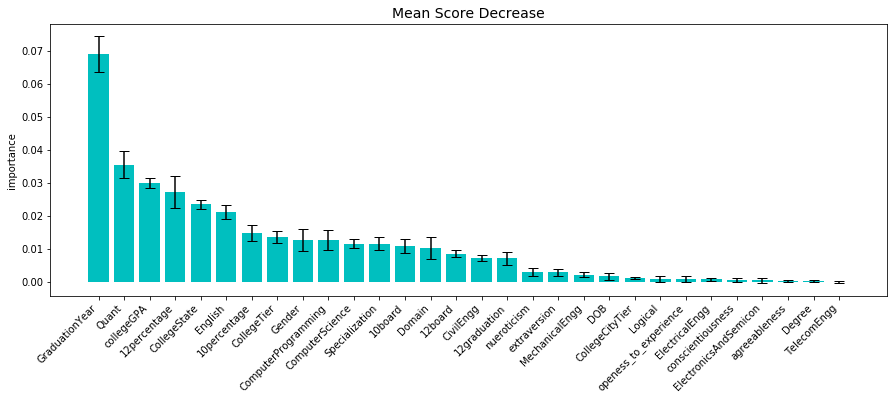

In [158]:
# feature importance berasarkan mean score decrease
mean_score_decrease( X_train, y_train, model, plot=True, topk=None, n_fold=5, normalize=False, random_state=42)

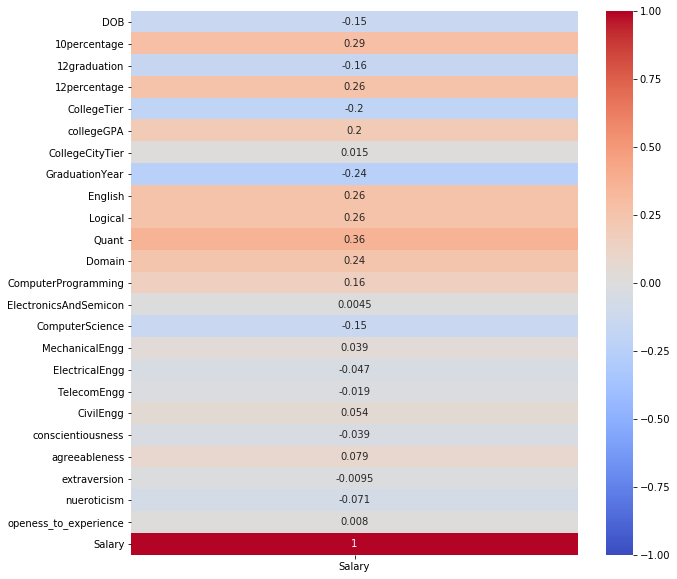

In [159]:
# menampilkan koefisien korelasi dalam bentuk heatmap
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df.corr()['Salary']), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Elastic Net dengan feature terpilih

Feature dipilih berdasarkan mean score decrease, korelasi terhadap target, dan trial & error

In [160]:
# Column Transformer dengan features terpilih
transformer_imp = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['10percentage', '12percentage', '12graduation', 'GraduationYear', 'collegeGPA',  'English',  'Quant', 'Domain']),
    ('categoric', cat_pipe(encoder='onehot'), ['Gender','10board','12board','CollegeTier','Specialization', 'CollegeState'])
])



In [161]:
# algo elastic net
algo = ElasticNet(
    alpha = 0.09178539435251566,
    fit_intercept = True,
    l1_ratio = 0.7106628896857875
)

# model pipeline
model = Pipeline([
    ('prep', transformer_imp),
    ('algo', algo)
])

# fitting model to train set
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['10percentage',
                                                   '12percentage',
                                                   '12graduation',
                                                   'GraduationYear',
                                                   'collegeGPA', 'English',
                                                   'Quant', 'Domain']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
            

In [162]:
# Predict to X_test
y_pred = model.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3335
RMSE      113120.9364


### Feature Importance berhasil meningkatkan performa model meskipun hanya sedikit, tetapi mempercepat proses modeling karena feature berkurang dari 30 features menjadi 14 features

# 5. Polynomial Features
coba polynomial features

In [163]:
# polynomial feature
poly = PolynomialFeatures(degree=2)

# algo elastic net
algo = ElasticNet(
    alpha = 0.09178539435251566,
    fit_intercept = True,
    l1_ratio = 0.7106628896857875
)

# model pipeline
model = Pipeline([
    ('prep', transformer_imp),
    ('poly', poly),
    ('algo', algo)
])

# fitting model to train set
model.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['10percentage',
                                                   '12percentage',
                                                   '12graduation',
                                                   'GraduationYear',
                                                   'collegeGPA', 'English',
                                                   'Quant', 'Domain']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
            

In [164]:
# Predict to X_test
y_pred = model.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3178
RMSE      114447.2728


### Polynomial Feature tidak meningkatkan performa model 

# 6. Best Model & Save Model
Inilah model final dengan algoritma Elastic Net, 14 Features terpilih

In [165]:
# Features and Target
X = df[['10percentage', '12percentage', '12graduation', 'GraduationYear', 'collegeGPA',  'English',  'Quant', 'Domain','Gender','10board','12board','CollegeTier','Specialization', 'CollegeState']] 
y = df['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
X_train.shape

(2302, 14)

In [167]:
# Column Transformer
transformer_imp = ColumnTransformer([
    ('numeric', num_pipe(scaling='robust'), ['10percentage', '12percentage', '12graduation', 'GraduationYear', 'collegeGPA',  'English',  'Quant', 'Domain']),
    ('categoric', cat_pipe(encoder='onehot'), ['Gender','10board','12board','CollegeTier','Specialization', 'CollegeState'])
])


In [168]:
# Columns berhasil ditransform
X_train_trans = transformer_imp.fit_transform(X_train)
X_train_trans.shape

(2302, 499)

In [169]:
# Menampilkan proses pipeline transformasi
transformer_imp.transformers_

[('numeric',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                  ('scaler', RobustScaler())]),
  ['10percentage',
   '12percentage',
   '12graduation',
   'GraduationYear',
   'collegeGPA',
   'English',
   'Quant',
   'Domain']),
 ('categoric',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder(handle_unknown='ignore'))]),
  ['Gender',
   '10board',
   '12board',
   'CollegeTier',
   'Specialization',
   'CollegeState'])]

## Best Model

In [170]:
# algo elastic net
algo = ElasticNet(
    alpha = 0.09178539435251566,
    fit_intercept = True,
    l1_ratio = 0.7106628896857875
)

# model pipeline
model_final = Pipeline([
    ('prep', transformer_imp),
    ('algo', algo)
])

# fitting model to train set
model_final.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['10percentage',
                                                   '12percentage',
                                                   '12graduation',
                                                   'GraduationYear',
                                                   'collegeGPA', 'English',
                                                   'Quant', 'Domain']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
            

In [171]:
# Predict to X_test
y_pred = model_final.predict(X_test)

# Final Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3335
RMSE      113120.9364


## Save Model

In [116]:
import pickle

In [117]:
pickle.dump(model_final, open('Final_ElasticNet.sav', 'wb'))

# Kesimpulan

- Model terbaik untuk dataset ini adalah Elastic Net dengan alpha=0.0917 dan L1_ratio=0.71
- Feature Importance sedikit meningkatkan performa model dan lebih cepat
- Polynomial Features tidak meningkatkan performa model
- Score terbaik yang diperoleh yaitu R-squre:0.3335 dan RMSE:113120.9364